# Fitting the dispersion of polariton modes

Our aim is to find the position of the modes on the dispersion relation. We will retrieve the energies of the bare and coupled modes. To simplify the problem we will try to avoid using Gaussian fitting.

### Importing the packages

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import utils
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.offsetbox as offsetbox

### Setting parameters

In [2]:
plt.rcParams.update({'font.size': 15}) # font size
cmap = plt.get_cmap('Spectral_r')  # color scale

### Importing the data

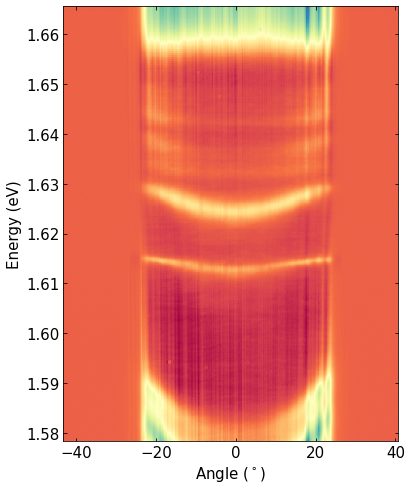

In [3]:
file = np.loadtxt('DispersionData5x5.txt')
data = file[1:,1:] # normalized map of reflectivity
enereV = file[0,1:] # energy in eV
angles = file[1:,0] # angle in degrees
# print(enereV)
# print(angle)
# print(data)

# Preview of loaded data
fig, ax = plt.subplots(1,1, figsize=(6, 8), facecolor='w', edgecolor='k')   # new canva for a plot
ax.pcolormesh(angles, enereV, data.T, cmap=cmap, shading='auto') # plotting the map with coordinates given by two lists
ax.set_xlabel('Angle ($^\circ$)') # x label
ax.set_ylabel('Energy (eV)') # y label
ax.tick_params(axis='both', direction = "in", which='major',
       right = True, top = True, left = True) # ticks properties
plt.show() # showing the plot

The presented reflectivity map shows (at least) five modes resulting from strong coupling between four oscillators and a cavity mode. In the first step we plan to find the positions of all the modes. We will make cross sections of a map and fit the reflectivity minima for each angle. 

### Fitting procedure

We plot the cross section at zero angle to roughly estimate the initial parameters

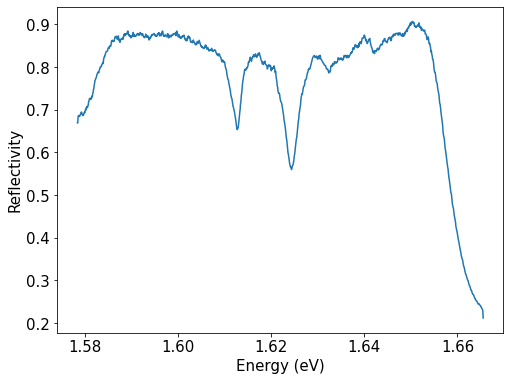

In [4]:
zeroDeg = utils.valueIndex(angles, 0)[1] # finding index of zero degree in angles

# Plotting the cross section at zero angle
fig, ax = plt.subplots(1,1, figsize=(8, 6), facecolor='w', edgecolor='k')   # new canva for a plot
plt.plot(enereV[:], data[zeroDeg,:]) # plotting the cross section at zero angle
ax.set_xlabel('Energy (eV)') # x label
ax.set_ylabel('Reflectivity') # y label
plt.show()

We plan to fit in two parallel loops starting from the center of the map where the cross section is very well defined and going to the edges.  

In [5]:
# initial parameters
popt = [0.7, 
        -0.2, 1.612, 0.0008, 
        -0.15, 1.625, 0.0009, 
        -0.03, 1.633, 0.0009, 
        -0.03, 1.633, 0.0009, 
        -0.03, 1.633, 0.0009] 

n_pix = 250 # defines the range of fitted angles
zakp = zeroDeg # idx1 of first range
zakk = zeroDeg + n_pix # idx2 of first range

zakp2 = zeroDeg - n_pix # idx1 of second range
zakk2 = zeroDeg # idx2 of second range

modes_pos_right = [] # position of the modes for positive angles 
modes_pos_left = [] # position of the modes for negative angles

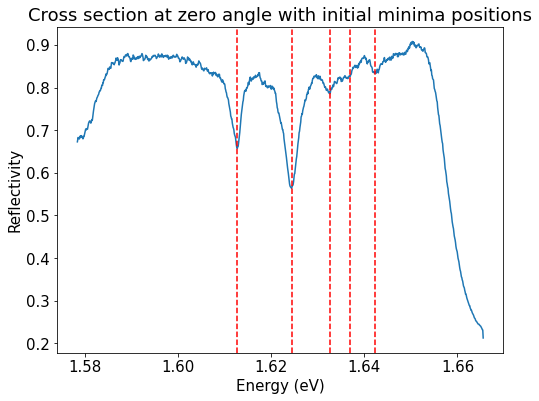

In [6]:
for i, j in zip(range(zakp2, zakk2)[::-1], range(zakp, zakk)): # two loops going through the set ranges
    fit_data = data[i, :] # crossection from the second range (of negative angles) 
    fit_data2 = data[j, :] # crossection from the first range (of positive angles) 
#     print('Fitting angle indices: {} + {}'.format(i,j)) # printing the indices of studied cross sections
    if j == zeroDeg: # this is the first fitting performed in a loop (zero angle)
        # finding the minima in the first fitted cross section (at zero angle)
        min_px, min2_px, min3_px, min4_px, min5_px = utils.FindMinimaFirst5(fit_data, start_px=150, stop_px=-150) 
        popt[2], popt[5], popt[8], popt[11], popt[14] = enereV[min_px], enereV[min2_px], enereV[min3_px], enereV[min4_px], enereV[min5_px]
        modes_pos_left.append([popt[2], popt[5], popt[8], popt[11], popt[14]])
        # plotting the cross section with the marked minima positions for initial fitting of gaussians
        fig, ax = plt.subplots(1,1, figsize=(8,6), facecolor='w', edgecolor='k')        
        plt.plot(enereV, fit_data)
        ax.axvline(x=enereV[min_px], color='r', linestyle='--')
        ax.axvline(x=enereV[min2_px], color='r', linestyle='--')
        ax.axvline(x=enereV[min3_px], color='r', linestyle='--')
        ax.axvline(x=enereV[min4_px], color='r', linestyle='--')
        ax.axvline(x=enereV[min5_px], color='r', linestyle='--')
        ax.set_xlabel('Energy (eV)')
        ax.set_ylabel('Reflectivity')
        plt.title('Cross section at zero angle with initial minima positions')
        plt.show()
    else: # all the other angles   
        # finding the minima in the cross section based on previously found minima
        
        # negative angles
        min_px, min2_px, min3_px, min4_px, min5_px = utils.FindMinimaNext5(fit_data, min_px, min2_px, min3_px, min4_px, min5_px) # finding the local minima in the cross section based on previously found minima
        popt[2], popt[5], popt[8], popt[11], popt[14] = enereV[min_px], enereV[min2_px], enereV[min3_px], enereV[min4_px], enereV[min5_px]
        modes_pos_left.append([popt[2], popt[5], popt[8], popt[11], popt[14]]) # saving the found energies
        
        # positive angles
        min_px, min2_px, min3_px, min4_px, min5_px = utils.FindMinimaNext5(fit_data2, min_px, min2_px, min3_px, min4_px, min5_px) # finding the local minima in the cross section based on previously found minima
        popt[2], popt[5], popt[8], popt[11], popt[14] = enereV[min_px], enereV[min2_px], enereV[min3_px], enereV[min4_px], enereV[min5_px]
        modes_pos_right.append([popt[2], popt[5], popt[8], popt[11], popt[14]]) # saving the found energies
   

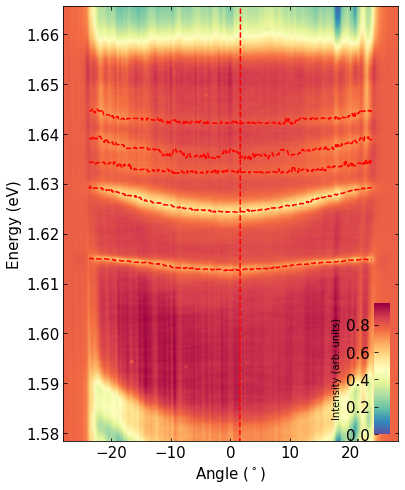

In [7]:
modes_pos = utils.joinModes(modes_pos_left, modes_pos_right, angles, zakp2+1, zakk) # merging the found energies in both ranges
utils.plotMapWithModes(angles, enereV, data, modes_pos) # plotting the found energies on a reflectivity map 

### Fitting the solutions of the Schroedinger equation

To precisely describe the energies of the modes and retrieve the bare modes energies we will solve the Schroedinger equation for a coupled-oscillator Hamiltonian. We will fit the solution of this equation to the previously found energies of the modes. All the polariton branches will be fitted simultaneously.

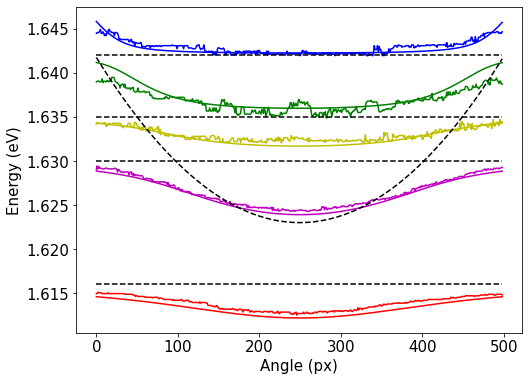

In [8]:
angles_px = np.linspace(1, len(modes_pos), len(modes_pos))
combo_angles_px = np.concatenate([angles_px, angles_px, angles_px, angles_px, angles_px]) # list of angles for all polariton modes
combo_modes_pos = np.concatenate([modes_pos[:,1], modes_pos[:,2], modes_pos[:,3], modes_pos[:,4], modes_pos[:,5]]) # list of energies of all polariton modes
utils.setDataLength(modes_pos) # saves globally the number of found energies
params = np.array([1.616, 1.63, 1.635, 1.642, 0.012, 0.008, 0.006, 0.004, 1.623, 3*10**(-5)]) # initial parameters for fitting
utils.plotInitParams5x5(modes_pos, *params) # plot modes for initial parameters together with the found energies modes

In [9]:
fittedParams, pcov = curve_fit(utils.combinedF5x5, combo_angles_px, combo_modes_pos, params) # fitting the eigenvalues of the Hamiltonian
perr = np.sqrt(np.diag(pcov)) # calculating the standard deviation 
E1, E2, E3, E4, Om1, Om2, Om3, Om4, c, d = fittedParams # unpacking the parameters
y_fit_1 = utils.solveH5x5(*fittedParams)[0] # first data set, first equation
y_fit_2 = utils.solveH5x5(*fittedParams)[1] # second data set, second equation
y_fit_3 = utils.solveH5x5(*fittedParams)[2] # third data set, third equation
y_fit_4 = utils.solveH5x5(*fittedParams)[3] # fourth data set, fourth equation
y_fit_5 = utils.solveH5x5(*fittedParams)[4] # fifth data set, fifth equation

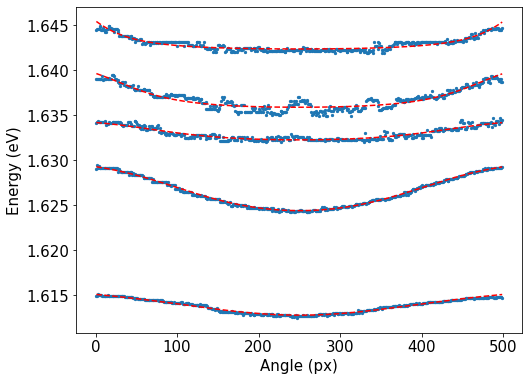

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,6), facecolor='w', edgecolor='k') 
ax.scatter(combo_angles_px, combo_modes_pos, s=5) # plot the raw data
ax.plot(angles_px, y_fit_1, 'r--') # plot the equation using the fitted parameters
ax.plot(angles_px, y_fit_2, 'r--') # plot the equation using the fitted parameters
ax.plot(angles_px, y_fit_3, 'r--') # plot the equation using the fitted parameters
ax.plot(angles_px, y_fit_4, 'r--') # plot the equation using the fitted parameters
ax.plot(angles_px, y_fit_5, 'r--') # plot the equation using the fitted parameters
ax.set_xlabel('Angle (px)')
ax.set_ylabel('Energy (eV)')
plt.show()

The fitting procedure allowed us to obtain the energies of polariton modes with satisfactory result. We plot the modes together with the photoluminescence map.

### Plotting the result

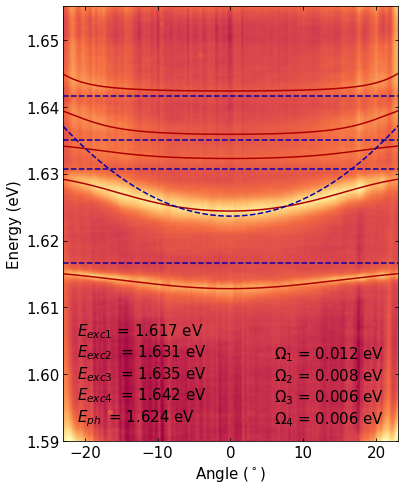

In [11]:
fig, ax = plt.subplots(1,1, figsize=(6, 8), facecolor='w', edgecolor='k')  
draw_map = ax.pcolormesh(angles, enereV, data.T, cmap=cmap,  alpha=1, shading ='gouraud', vmin=0)

k0 = 535

plt.plot(angles[zakp2:zakk-1], y_fit_1, color = [174/255, 0, 0])
plt.plot(angles[zakp2:zakk-1], y_fit_2, color = [174/255, 0, 0])
plt.plot(angles[zakp2:zakk-1], y_fit_3, color = [174/255, 0, 0])
plt.plot(angles[zakp2:zakk-1], y_fit_4, color = [174/255, 0, 0])
plt.plot(angles[zakp2:zakk-1], y_fit_5, color = [174/255, 0, 0])

ax.axhline(y=E1, color = [0, 0, 174/255], linestyle = '--')
ax.axhline(y=E2, color = [0, 0, 174/255], linestyle = '--')
ax.axhline(y=E3, color = [0, 0, 174/255], linestyle = '--')
ax.axhline(y=E4, color = [0, 0, 174/255], linestyle = '--')
plt.plot(angles[zakp2:zakk-1], c+d*np.array(angles[zakp2:zakk-1])*np.array(angles[zakp2:zakk-1]), color = [0, 0, 174/255], linestyle = '--')


downanno = offsetbox.AnchoredText('$E_{exc1}$ = ' + str(round(E1,3)) +
                                  ' eV \n$E_{exc2~}$ = ' + str(round(E2,3)) +
                                  ' eV \n$E_{exc3~}$ = ' + str(round(E3,3)) +
                                  ' eV \n$E_{exc4~}$ = ' + str(round(E4,3)) +
                                  ' eV \n$E_{ph~}$ = ' + str(round(c,3)) + ' eV',
                                    loc=3, frameon=False)
ax.add_artist(downanno)
downanno2 = offsetbox.AnchoredText('$\Omega_1$ = ' + str(round(Om1,3)) + ' eV' + 
                                   '\n$\Omega_2$ = ' + str(round(Om2,3)) + ' eV' + 
                                   '\n$\Omega_3$ = ' + str(round(Om3,3)) + ' eV' +
                                   '\n$\Omega_4$ = ' + str(round(Om4,3)) + ' eV', 
                                    loc=4, frameon=False)
ax.add_artist(downanno2)
        
ax.set_xlabel('Angle ($^\circ$)')
ax.set_ylabel('Energy (eV)')
ax.set_xlim((-23, 23))
ax.set_ylim(1.59, 1.655)
ax.tick_params(axis='both', direction = "in", which='major',
       right = True, top = True, left = True)